In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar
import datetime as dt
import plotly.io as pio

In [3]:
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import warnings
warnings.filterwarnings("ignore")

import ipywidgets as widgets
from IPython.display import display, clear_output

In [4]:
res=widgets.Text(placeholder='Yes/No')

In [5]:
button_send=widgets.Button(description='Submit', tooltip='Submit',style={'description_width': 'initial'})
output=widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Successfully submitted your response.")
        #print(f"Hi {name.value}")
        if res.value=='Yes':
            print("Congratulations! You are still employed.")
        else:
            print("Dont loose hope. You'll get a better job soon.")
        
button_send.on_click(on_button_clicked)
vbox_result=widgets.VBox([button_send,output])

In [6]:
text_0=widgets.HTML(value="<h1>Welcome to COVID-19 Job Dashboard</h1>")
text_1=widgets.HTML(value="<h4>Are you still employed?</h4>")
vbox_text=widgets.VBox([text_0,text_1,res,vbox_result])

In [7]:
page=widgets.HBox([vbox_text])
display(page)

In [8]:
finan=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Statewise_unemp.csv")
fi=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Hiring_index.csv")
fi1=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Unemploment_rate.csv")
fi2=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Unemploy_rate_feb.csv")
fi3=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Statewise_unemp_apr.csv")
dat1=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Unemployment_Rate_upto_11_2020.csv")

In [9]:
fp=r'C:/Users/Prijita/Downloads/Assign5/india-polygon.shp'
data=gpd.read_file(fp)

In [10]:
dat=data.drop(columns=['id'])

In [11]:
dat.sort_values(by=['st_nm'],inplace=True)

In [12]:
merged=finan.set_index('States').join(dat.set_index('st_nm'))

In [13]:
merged['March']=merged['March'].replace(np.nan,-1)

In [14]:
from geopandas import GeoDataFrame

In [15]:
merged2=fi2.set_index('States').join(dat.set_index('st_nm'))

In [16]:
merged3=GeoDataFrame(merged2)

### The three graphs below show the unemployment rate in February, March, April in 2021

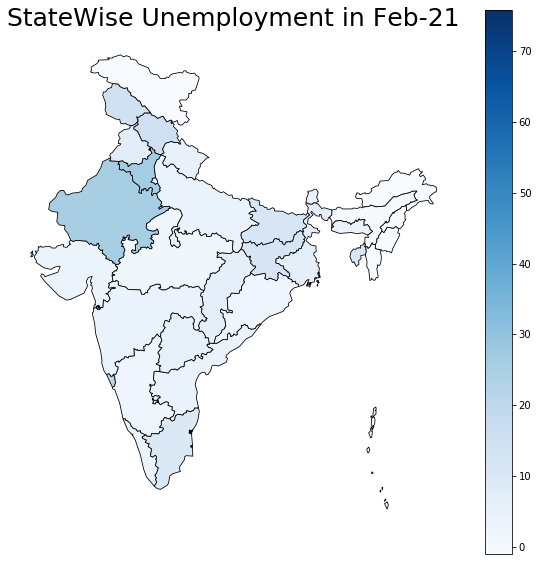

In [17]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Unemployment in Feb-21',fontdict={'fontsize':'25','fontweight':'10'})
variable='Feb-21'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [18]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=fi2['States'],
    z=fi2['Feb-21'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Feb-21"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=-1,
        dtick=11,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Unemployment in Feb-21",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

In [19]:
merged=finan.set_index('States').join(dat.set_index('st_nm'))

In [20]:
merged1=GeoDataFrame(merged)

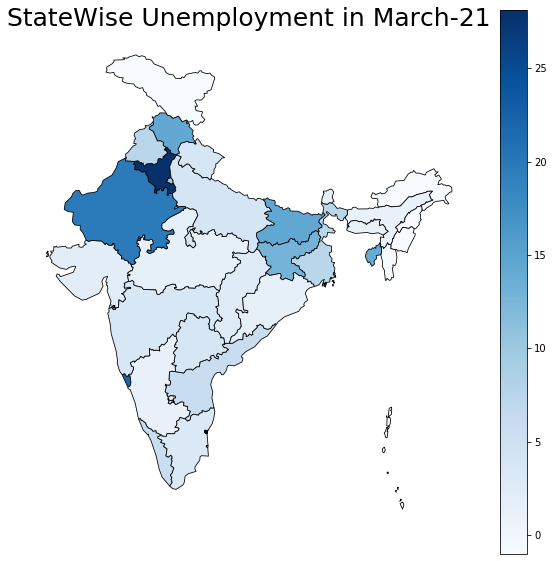

In [21]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Unemployment in March-21',fontdict={'fontsize':'25','fontweight':'10'})
variable='March'
merged1.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [22]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=finan['States'],
    z=finan['March'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Mar-21"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=-1,
        dtick=11,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Unemployment in Mar-21",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

In [23]:
merged4=fi3.set_index('States').join(dat.set_index('st_nm'))

In [24]:
merged5=GeoDataFrame(merged4)

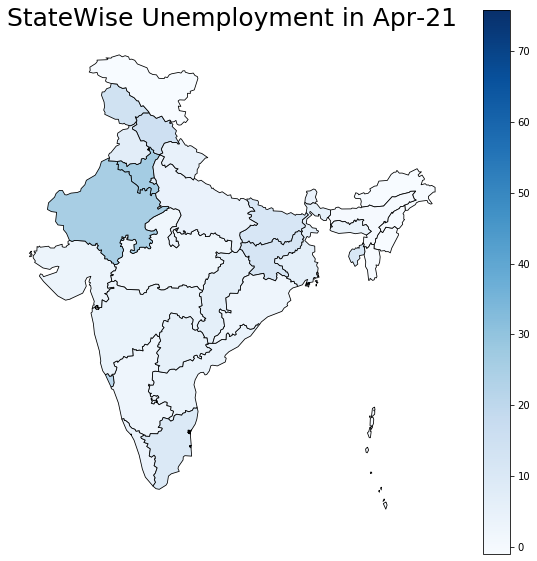

In [25]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Unemployment in Apr-21',fontdict={'fontsize':'25','fontweight':'10'})
variable='Feb-21'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [26]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=fi3['States'],
    z=fi3['April'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Apr-21"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=-1,
        dtick=11,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Unemployment in Apr-21",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### The below 3 graphs of choropleth shows the unemployment rate of February, March, April of 2021

### The below boxplot shows the hiring index month wise of 2020

In [27]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
hir=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/hiring_box.csv")
iplot(hir.iplot(asFigure=True, kind='box',title='Visualize the hiring index', dimensions=(800,500)))

### Hiring Index of year 2020

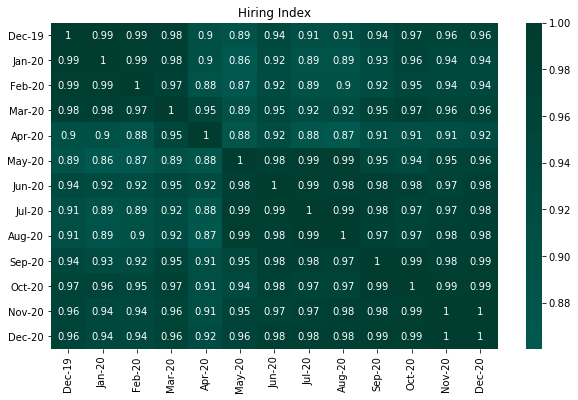

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(fi.corr(), center=0, cmap='BrBG',annot=True)
ax.set_title('Hiring Index');

### Area plot to visualize the hiring index of India for 2020 sector wise

In [29]:
plot = go.Figure(data=[go.Scatter(
    x = fi["Industry"],
    y = fi["Dec-19"],
    name="Dec-19",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Jan-20"],
    name="Jan-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Feb-20"],
    name="Feb-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Mar-20"],
    name="Mar-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Apr-20"],
    name="Apr-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["May-20"],
    name="May-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Jun-20"],
    name="Jun-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Jul-20"],
    name="Jul-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Aug-20"],
    name="Aug-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Sep-20"],
    name="Sep-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Oct-20"],
    name="Oct-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Nov-20"],
    name="Nov-20",
    stackgroup='one'),
                       go.Scatter(
    x = fi["Industry"],
    y = fi["Dec-20"],
    name="Dec-20",
    stackgroup='one')
])
plot.update_layout(title = "Visualize the Hiring Index of India")                   
plot.show()

### Bar plot to compare the hiring index for 3 months sector wise

In [30]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace1 = go.Bar(x=fi["Industry"],y=fi["Dec-19"],name='Dec-19')
trace2 = go.Bar(x=fi["Industry"],y=fi["Jan-20"],name='Jan-20')
trace3 = go.Bar(x=fi["Industry"],y=fi["Feb-20"],name='Feb-20')

data = [trace1, trace2, trace3]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="Sector-wise Hiring Index",width=800,height=500,)
})

In [31]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace7 = go.Bar(x=fi["Industry"],y=fi["Mar-20"],name='Mar-20')
trace8 = go.Bar(x=fi["Industry"],y=fi["Apr-20"],name='Apr-20')
trace9 = go.Bar(x=fi["Industry"],y=fi["May-20"],name='May-20')

data = [trace7, trace8, trace9]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="Sector-wise Hiring Index",width=800,height=500,)
})

In [32]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace10 = go.Bar(x=fi["Industry"],y=fi["Jun-20"],name='Jun-20')
trace11 = go.Bar(x=fi["Industry"],y=fi["Jul-20"],name='Jul-20')
trace12 = go.Bar(x=fi["Industry"],y=fi["Aug-20"],name='Aug-20')

data = [trace10, trace11, trace12]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="Sector-wise Hiring Index",width=800,height=500,)
})

In [33]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace4 = go.Bar(x=fi["Industry"],y=fi["Oct-20"],name='Oct-20')
trace5 = go.Bar(x=fi["Industry"],y=fi["Nov-20"],name='Nov-20')
trace6 = go.Bar(x=fi["Industry"],y=fi["Dec-20"],name='Dec-20')

data = [trace4, trace5, trace6]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="Sector-wise Hiring Index",width=800,height=500,)
})

### PairPlot for Hiring Index

Hiring Index Pair Plot


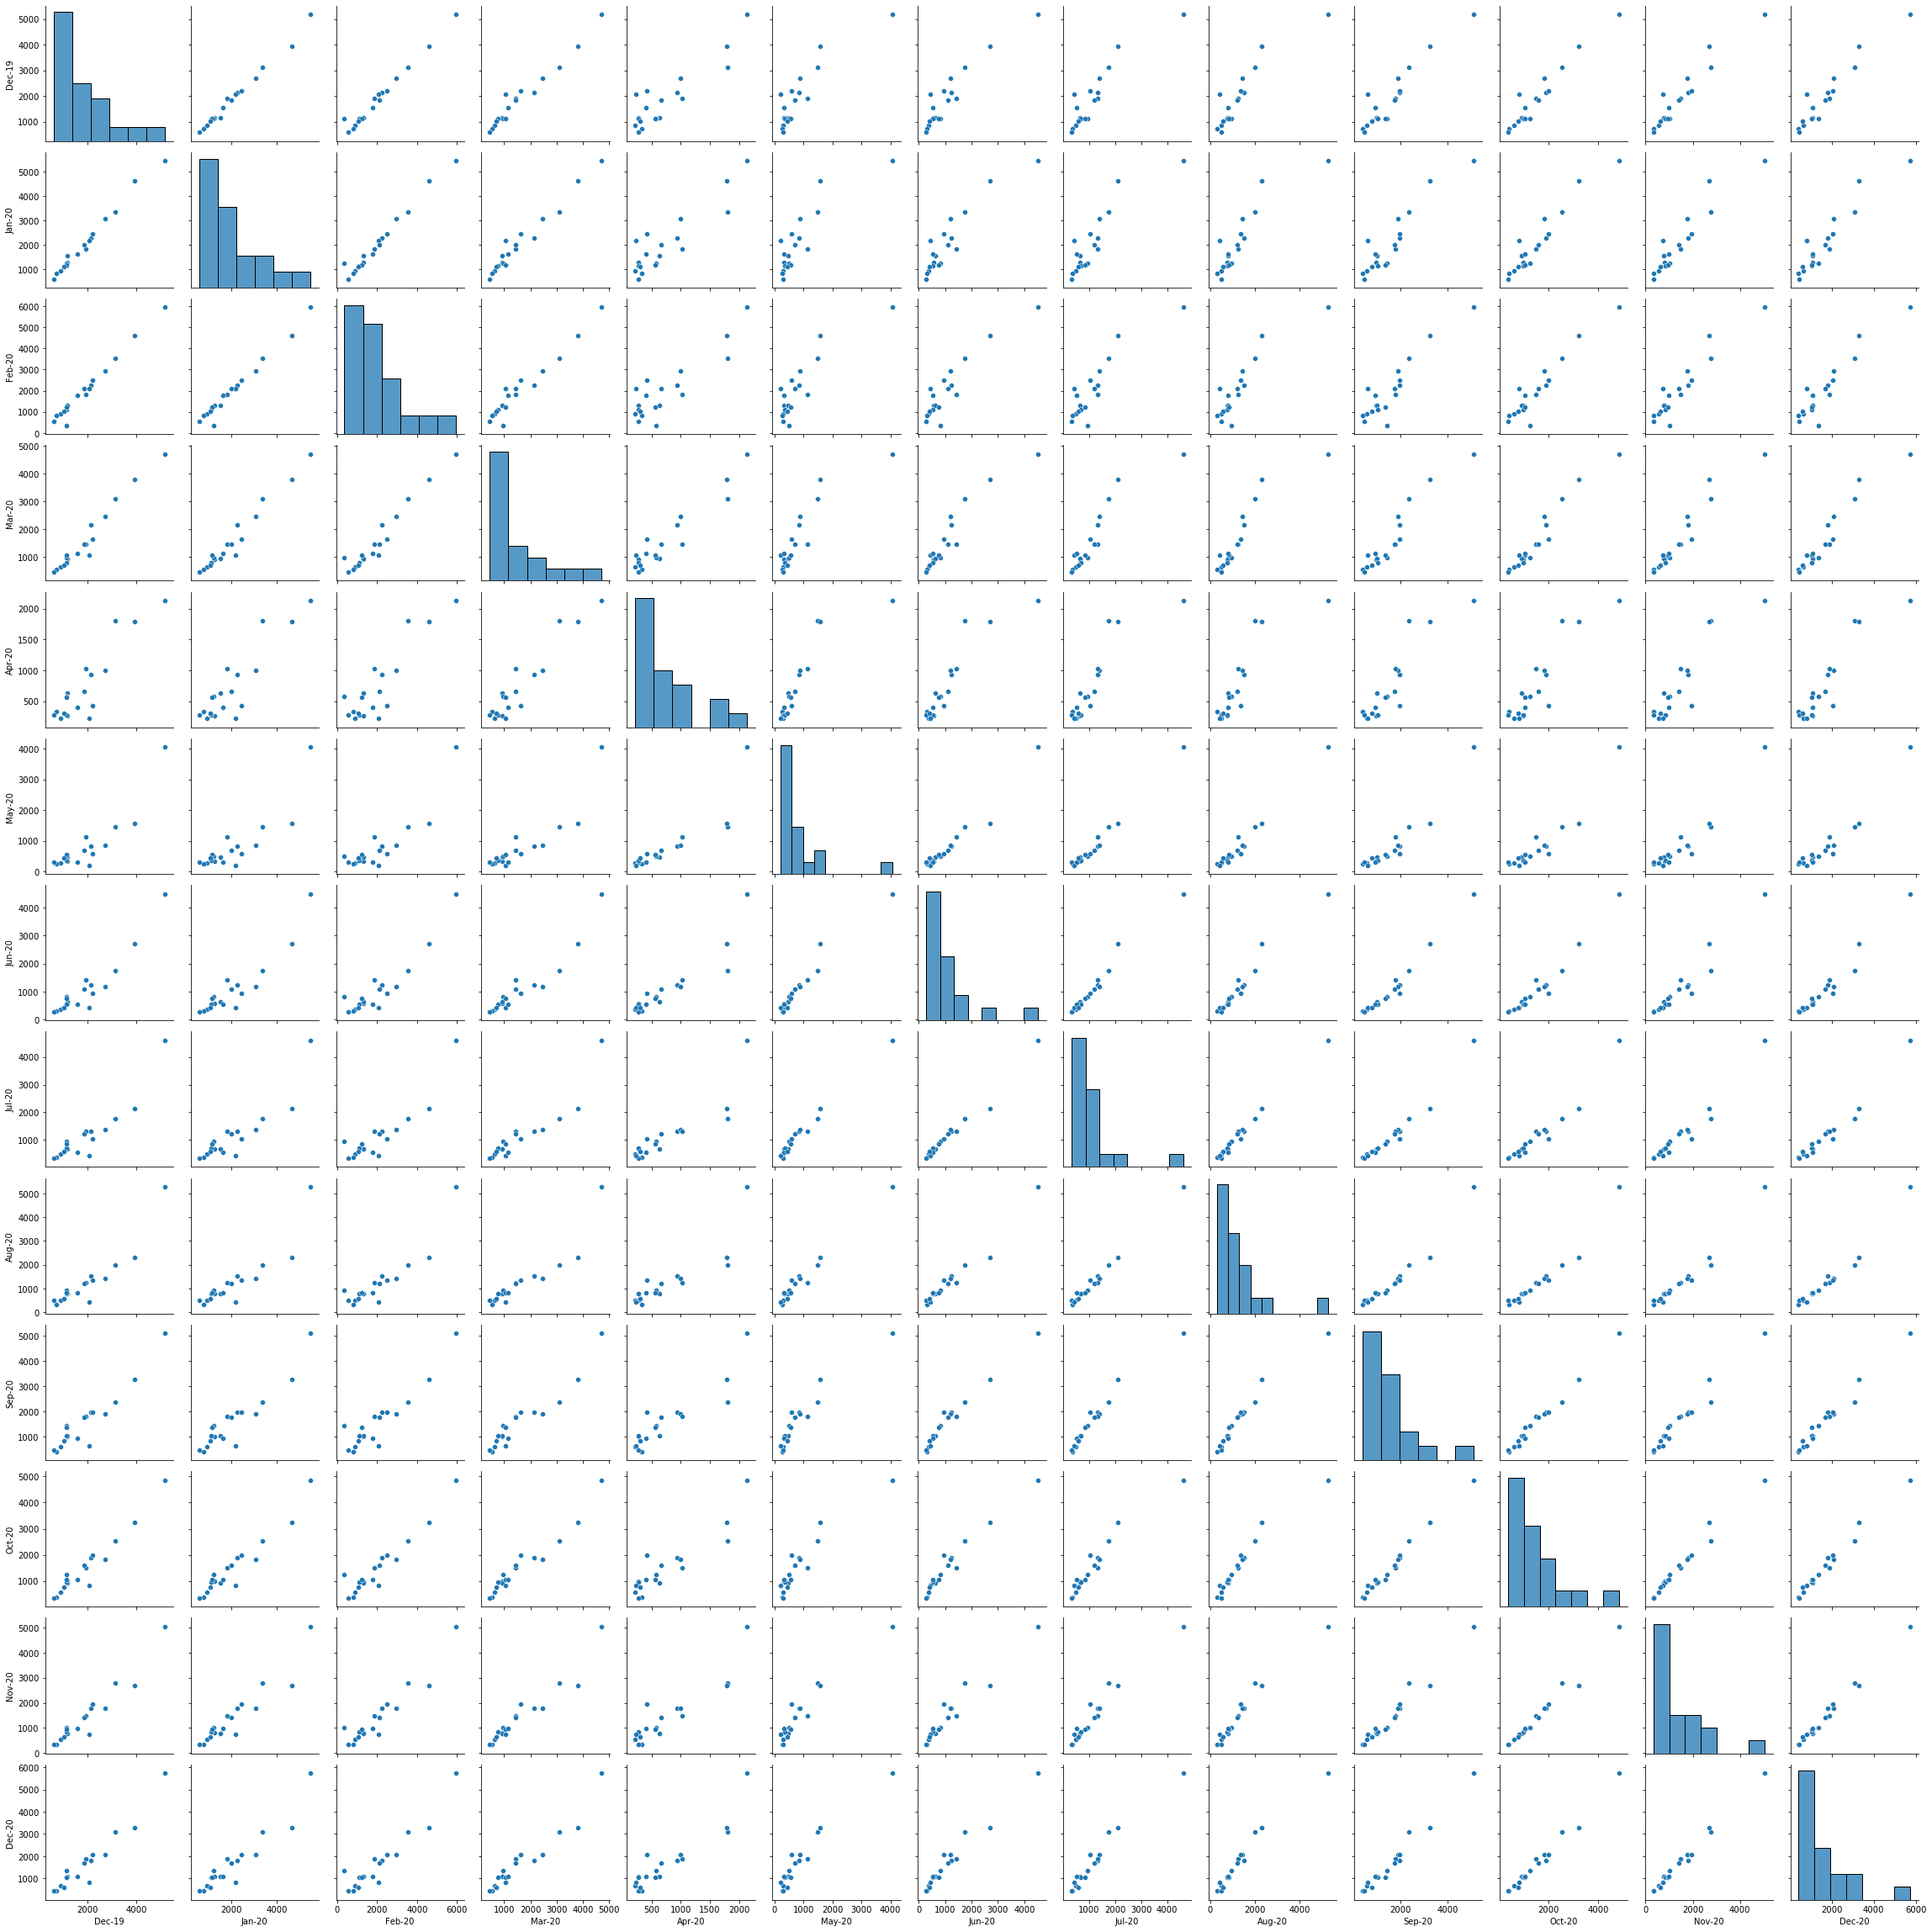

In [34]:
print("Hiring Index Pair Plot")
sns.pairplot(fi);

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [36]:
dat1.columns =['States','Date','Frequency','Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate','Region','Longitude','Latitude']

In [37]:
dat1['Date'] = pd.to_datetime(dat1['Date'],dayfirst=True)

In [38]:
dat1['Frequency']= dat1['Frequency'].astype('category')

In [39]:
dat1['Month'] =  dat1['Date'].dt.month

In [40]:
dat1['Month_int'] = dat1['Month'].apply(lambda x : int(x))

In [41]:
dat1['Month_name'] =  dat1['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [42]:
dat1['Region'] = dat1['Region'].astype('category')

In [43]:
dat1.drop(columns='Month',inplace=True)

In [44]:
df_stats = dat1[['Estimated_Unemployment_Rate','Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
df_stats = round(df_stats.T,2)

In [45]:
region_stats = dat1.groupby(['Region'])[['Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate']].mean().reset_index()
region_stats = round(region_stats,2)

### HeatMap for getting the unemployment rate , estimates employed and estimated labour participation rate

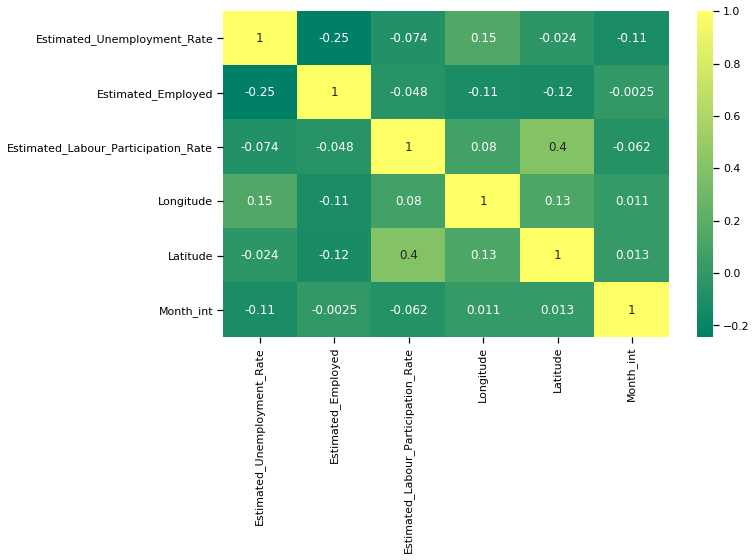

In [46]:
heat_maps = dat1[['Estimated_Unemployment_Rate','Estimated_Employed', 'Estimated_Labour_Participation_Rate','Longitude', 'Latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

### Boxplot for statewise unemployment rate

In [47]:
fig = px.box(dat1,x='States',y='Estimated_Unemployment_Rate',points="all", color='States',title='Unemployment rate using BoxPlot',template='plotly')
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Scatterplot matrix for employment rate, employed and labour participation rate

In [48]:
fig = px.scatter_matrix(dat1,template='plotly',dimensions=['Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate'],color='Region')
fig.show()

### Barplot to visualize the estimated unemployment rate

In [49]:
plot_ump = dat1[['Estimated_Unemployment_Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated_Unemployment_Rate')
fig = px.bar(df_unemp, x='States',y='Estimated_Unemployment_Rate',color='States',title='Average Unemployment Rate in each state',template='plotly')
fig.show()

### Stacked bar plot for visualizing the estimated unemployment rate with an animation scale of month name

In [50]:
fig = px.bar(dat1, x='Region',y='Estimated_Unemployment_Rate',animation_frame = 'Month_name',color='States',title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [51]:
unemplo_df = dat1[['States','Region','Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate']]
unemplo = unemplo_df.groupby(['Region','States'])['Estimated_Unemployment_Rate'].mean().reset_index()

### Pie chart w.r.t. regions for estimated unemployment rate

In [52]:
fig = px.sunburst(unemplo, path=['Region','States'], values='Estimated_Unemployment_Rate',color_continuous_scale='Plasma',title= 'Unemployment rate in each region and state',height=650,template='ggplot2')
fig.show()

### The below graph shows the impact of lockdown on employment

In [53]:
fig = px.scatter_geo(dat1,'Longitude', 'Latitude', color="Region",hover_name="States", size="Estimated_Unemployment_Rate",animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",showocean=True)
fig.show()

In [54]:
lock = dat1[(dat1['Month_int'] >= 4) & (dat1['Month_int'] <=7)]
bf_lock = dat1[(dat1['Month_int'] >= 1) & (dat1['Month_int'] <=4)]

In [55]:
g_lock = lock.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()
g_lock['Unemployment_Rate_before_lockdown'] = g_bf_lock['Estimated_Unemployment_Rate']
g_lock.columns = ['States','Unemployment_Rate_after_lockdown','Unemployment_Rate_before_lockdown']

In [56]:
g_lock['Percentage_change_in_unemployment'] = round(g_lock['Unemployment_Rate_after_lockdown'] - g_lock['Unemployment_Rate_before_lockdown']/g_lock['Unemployment_Rate_before_lockdown'],2)

In [57]:
plot_per = g_lock.sort_values('Percentage_change_in_unemployment')

### The below graph shows the Percentage change in unemployment after lockdown
### We can see that the four most affected states are:
#### 1.Puducherry
#### 2.Jharkhand
#### 3.Bihar
#### 4.Haryana

In [58]:
fig = px.bar(plot_per, x='States',y='Percentage_change_in_unemployment',color='Percentage_change_in_unemployment',title='Percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

In [59]:
def sort_impact(x):
    if x<=10:
        return 'Impacted_States'
    elif x>10 and x<=20:
        return 'Hard_Impacted_States'
    elif x>20 and x<=30:
        return 'Harder_Impacted_States'
    elif x>30:
        return 'Hardest_Impacted_States'
    return x

In [60]:
plot_per['Impact_status'] = plot_per['Percentage_change_in_unemployment'].apply(lambda x:sort_impact(x))

### The below graph shows the most impacted states due to lockdown an those are:
#### 1.Puducherry
#### 2.Jharkhand
#### 3.Bihar
#### 4.Haryana

In [61]:
#fig = px.bar(plot_per, y='States', x='Percentage_change_in_unemployment', color='Impact_status')
fig = px.bar(plot_per, x='States',y='Percentage_change_in_unemployment',color='Impact_status',title='Impact of lockdown on employment across states',template='ggplot2')
fig.show()

### The below graph shows the unemployment rate according to months and we can see that May and April months are the most affected.

In [62]:
India = fi1.sort_values('India')
fig = px.bar(India, x='Month',y='India',color='India',title='Unemployment rate in India according to the months',template='ggplot2')
fig.show()

### The below graph shows the unemployment rate in rural area month wise

In [63]:
Rural = fi1.sort_values('Rural')
fig = px.bar(Rural, x='Month',y='Rural',color='Rural',title='Unemployment rate in Rural according to the months',template='ggplot2')
fig.show()

### The below graph shows the unemployment rate in Urban area month wise

In [64]:
Urban = fi1.sort_values('Urban')
fig = px.bar(Rural, x='Month',y='Urban',color='Urban',title='Unemployment rate in Urban according to the months',template='ggplot2')
fig.show()

### The below area plot gives the unemoloyment rate for Rural, Urban and India

In [65]:
plot = go.Figure(data=[go.Scatter(
    x = fi1["Month"],
    y = fi1["Rural"],
    name="Rural",
    stackgroup='one'),
                       go.Scatter(
    x = fi1["Month"],
    y = fi1["Urban"],
    name="Urban",
    stackgroup='one'),
                       go.Scatter(
    x = fi1["Month"],
    y = fi1["India"],
    name="India",
    stackgroup='one')

])
plot.update_layout(title = "Visualize the rural, urban and India unemployment rate")
plot.show()